[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dariush-bahrami/An-Observation-on-Distribution-of-Prime-Numbers/blob/master/Jupyter%20Notebooks/Paper%20-%20Figure%202%20-%20Reduction%20of%20QREE%20.ipynb)

In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = Path('data')
delta_quantity_path = Path.joinpath(data_dir, Path('delta_quantity_under_1b.npz'))

In [3]:
try:
    delta_quantity = np.load(delta_quantity_path)
except FileNotFoundError as error:
        print(error)
        in_colab = 'google.colab' in sys.modules
        if in_colab:
            print('running on colab, downloading data to session...')
            !mkdir data
            # Download delta_quantity_under_1b.npz
            !wget https://bit.ly/3fZDjtY -O data/delta_quantity_under_1b.npz
        else:
            print('Please download required data from paper repo')

In [4]:
print('δ quantity data is available for following orders:')
for order in delta_quantity.keys():
    print(order)

δ quantity data is available for following orders:
order_1
order_10
order_100
order_1000


In [5]:
def calculate_qere(order, delta_quantity, order_1_delta_quantity):
    ratio = delta_quantity/order_1_delta_quantity
    return abs(ratio-order) / order

In [6]:
qere_data = {}
order_1_delta_quantity = delta_quantity['order_1'][-1]
for order in ['order_10', 'order_100', 'order_1000']:
    order_int = int(order.split('_')[1])
    qere = calculate_qere(order_int,
                          delta_quantity[order][-1],
                          order_1_delta_quantity)
    print(f'QREE for δ of {order:10}: {qere}')
    qere_data[order_int] = qere

QREE for δ of order_10  : 0.36728579988016774
QREE for δ of order_100 : 0.27822049131216303
QREE for δ of order_1000: 0.09775314559616538


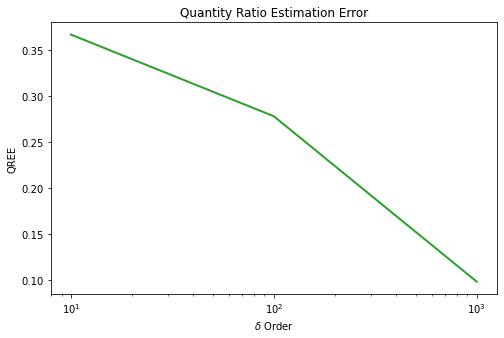

In [7]:
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax.plot(qere_data.keys(), qere_data.values(), color='tab:green', linewidth=2)
ax.set_title('Quantity Ratio Estimation Error')
ax.set_xlabel('$\delta$ Order')
ax.set_xscale('log')
ax.set_ylabel('QREE')
plt.show()